In [12]:
%reload_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Ignoramos los warnings
# -----------------------------------------------------------------------
import warnings
warnings.simplefilter("ignore", FutureWarning)

import sys
sys.path.append("../../")
from src import soporte_enconding as se
from src import soporte_desbalanceo as sd
from src import soporte_outliers as so

# SKlearn
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Se utiliza para el iterative
# -----------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import chi2_contingency

import pickle

In [13]:
data_pickle = pd.read_pickle("datos/data_final.pkl")
df = pd.DataFrame(data_pickle)

In [14]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,Y,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,Y,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,Y,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,Y,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [15]:
def detectar_orden_cat(lista_categoricas, var_res):
    lista_ordenas = []
    lista_desordenadas = []
    for categorica in lista_categoricas:
        print(f"Estamos evaluando la variable: {categorica.upper()}")
        df_cross_tab_gender = pd.crosstab(df[categorica], df[var_res])
        display(df_cross_tab_gender)

        chi2, p, dof, expected = chi2_contingency(df_cross_tab_gender)

        if p < 0.05:
            print(f"La variable categorica {categorica.upper()} si tiene orden\n")
            lista_ordenas.append(categorica)
        else:
            print(f"La variable categorica {categorica.upper()} no tiene orden\n")
            lista_desordenadas.append(categorica)

    return lista_ordenas, lista_desordenadas

In [16]:
lista_ordenadas, lista_desordenadas = detectar_orden_cat(df.select_dtypes(["object", "category"]), "Attrition")
diccionario_encoding = {"target": lista_ordenadas,
                        "onehot": lista_desordenadas}

print(lista_ordenadas)
print(lista_desordenadas)

encoding = se.Encoding(df, variable_respuesta="Attrition", diccionario_encoding=diccionario_encoding)
df_oh = encoding.one_hot_encoding()
display(df_oh.head())
df_target = encoding.target_encoding()
df_target.head()

Estamos evaluando la variable: BUSINESSTRAVEL


Attrition,0,1
BusinessTravel,,
Non-Travel,414,36
Travel_Frequently,624,207
Travel_Rarely,2661,468


La variable categorica BUSINESSTRAVEL si tiene orden

Estamos evaluando la variable: DEPARTMENT


Attrition,0,1
Department,,
Human Resources,132,57
Research & Development,2430,453
Sales,1137,201


La variable categorica DEPARTMENT si tiene orden

Estamos evaluando la variable: EDUCATIONFIELD


Attrition,0,1
EducationField,,
Human Resources,48,33
Life Sciences,1515,303
Marketing,402,75
Medical,1167,225
Other,216,30
Technical Degree,351,45


La variable categorica EDUCATIONFIELD si tiene orden

Estamos evaluando la variable: GENDER


Attrition,0,1
Gender,,
Female,1494,270
Male,2205,441


La variable categorica GENDER no tiene orden

Estamos evaluando la variable: JOBROLE


Attrition,0,1
JobRole,,
Healthcare Representative,336,57
Human Resources,135,21
Laboratory Technician,651,126
Manager,264,42
Manufacturing Director,387,48
Research Director,183,57
Research Scientist,717,159
Sales Executive,813,165
Sales Representative,213,36


La variable categorica JOBROLE si tiene orden

Estamos evaluando la variable: MARITALSTATUS


Attrition,0,1
MaritalStatus,,
Divorced,882,99
Married,1767,252
Single,1050,360


La variable categorica MARITALSTATUS si tiene orden

Estamos evaluando la variable: OVER18


Attrition,0,1
Over18,,
Y,3699,711


La variable categorica OVER18 no tiene orden

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
['Gender', 'Over18']


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,Over18_Y
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,1.0,0.0,1.0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,1.0,0.0,1.0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,0.0,1.0,1.0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,0.0,1.0,1.0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,0.0,1.0,1.0


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,Over18_Y
0,51,0,0.149569,0.150224,6,2,0.166667,1,0.145038,0.124814,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,1.0,0.0,1.0
1,31,1,0.249097,0.157128,10,1,0.166667,1,0.181507,0.255319,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,1.0,0.0,1.0
2,32,0,0.249097,0.157128,17,4,0.121951,4,0.168712,0.124814,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,0.0,1.0,1.0
3,38,0,0.080000,0.157128,2,5,0.166667,3,0.134615,0.124814,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,0.0,1.0,1.0
4,32,0,0.149569,0.157128,10,1,0.161638,1,0.168712,0.255319,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,0.0,1.0,1.0


In [17]:
df_target.shape

(4410, 27)

ZSCORE

La cantidad de outliers que tenemos para la columna AGE es  0
La cantidad de outliers que tenemos para la columna ATTRITION es  0
La cantidad de outliers que tenemos para la columna DISTANCEFROMHOME es  0
La cantidad de outliers que tenemos para la columna EDUCATION es  0
La cantidad de outliers que tenemos para la columna JOBLEVEL es  0
La cantidad de outliers que tenemos para la columna MONTHLYINCOME es  0
La cantidad de outliers que tenemos para la columna NUMCOMPANIESWORKED es  0
La cantidad de outliers que tenemos para la columna PERCENTSALARYHIKE es  0
La cantidad de outliers que tenemos para la columna STOCKOPTIONLEVEL es  0
La cantidad de outliers que tenemos para la columna TOTALWORKINGYEARS es  48
La cantidad de outliers que tenemos para la columna TRAININGTIMESLASTYEAR es  0
La cantidad de outliers que tenemos para la columna YEARSATCOMPANY es  75
La cantidad de outliers que tenemos para la columna YEARSSINCELASTPROMOTION es  126
La cantidad de outliers que tenemos p

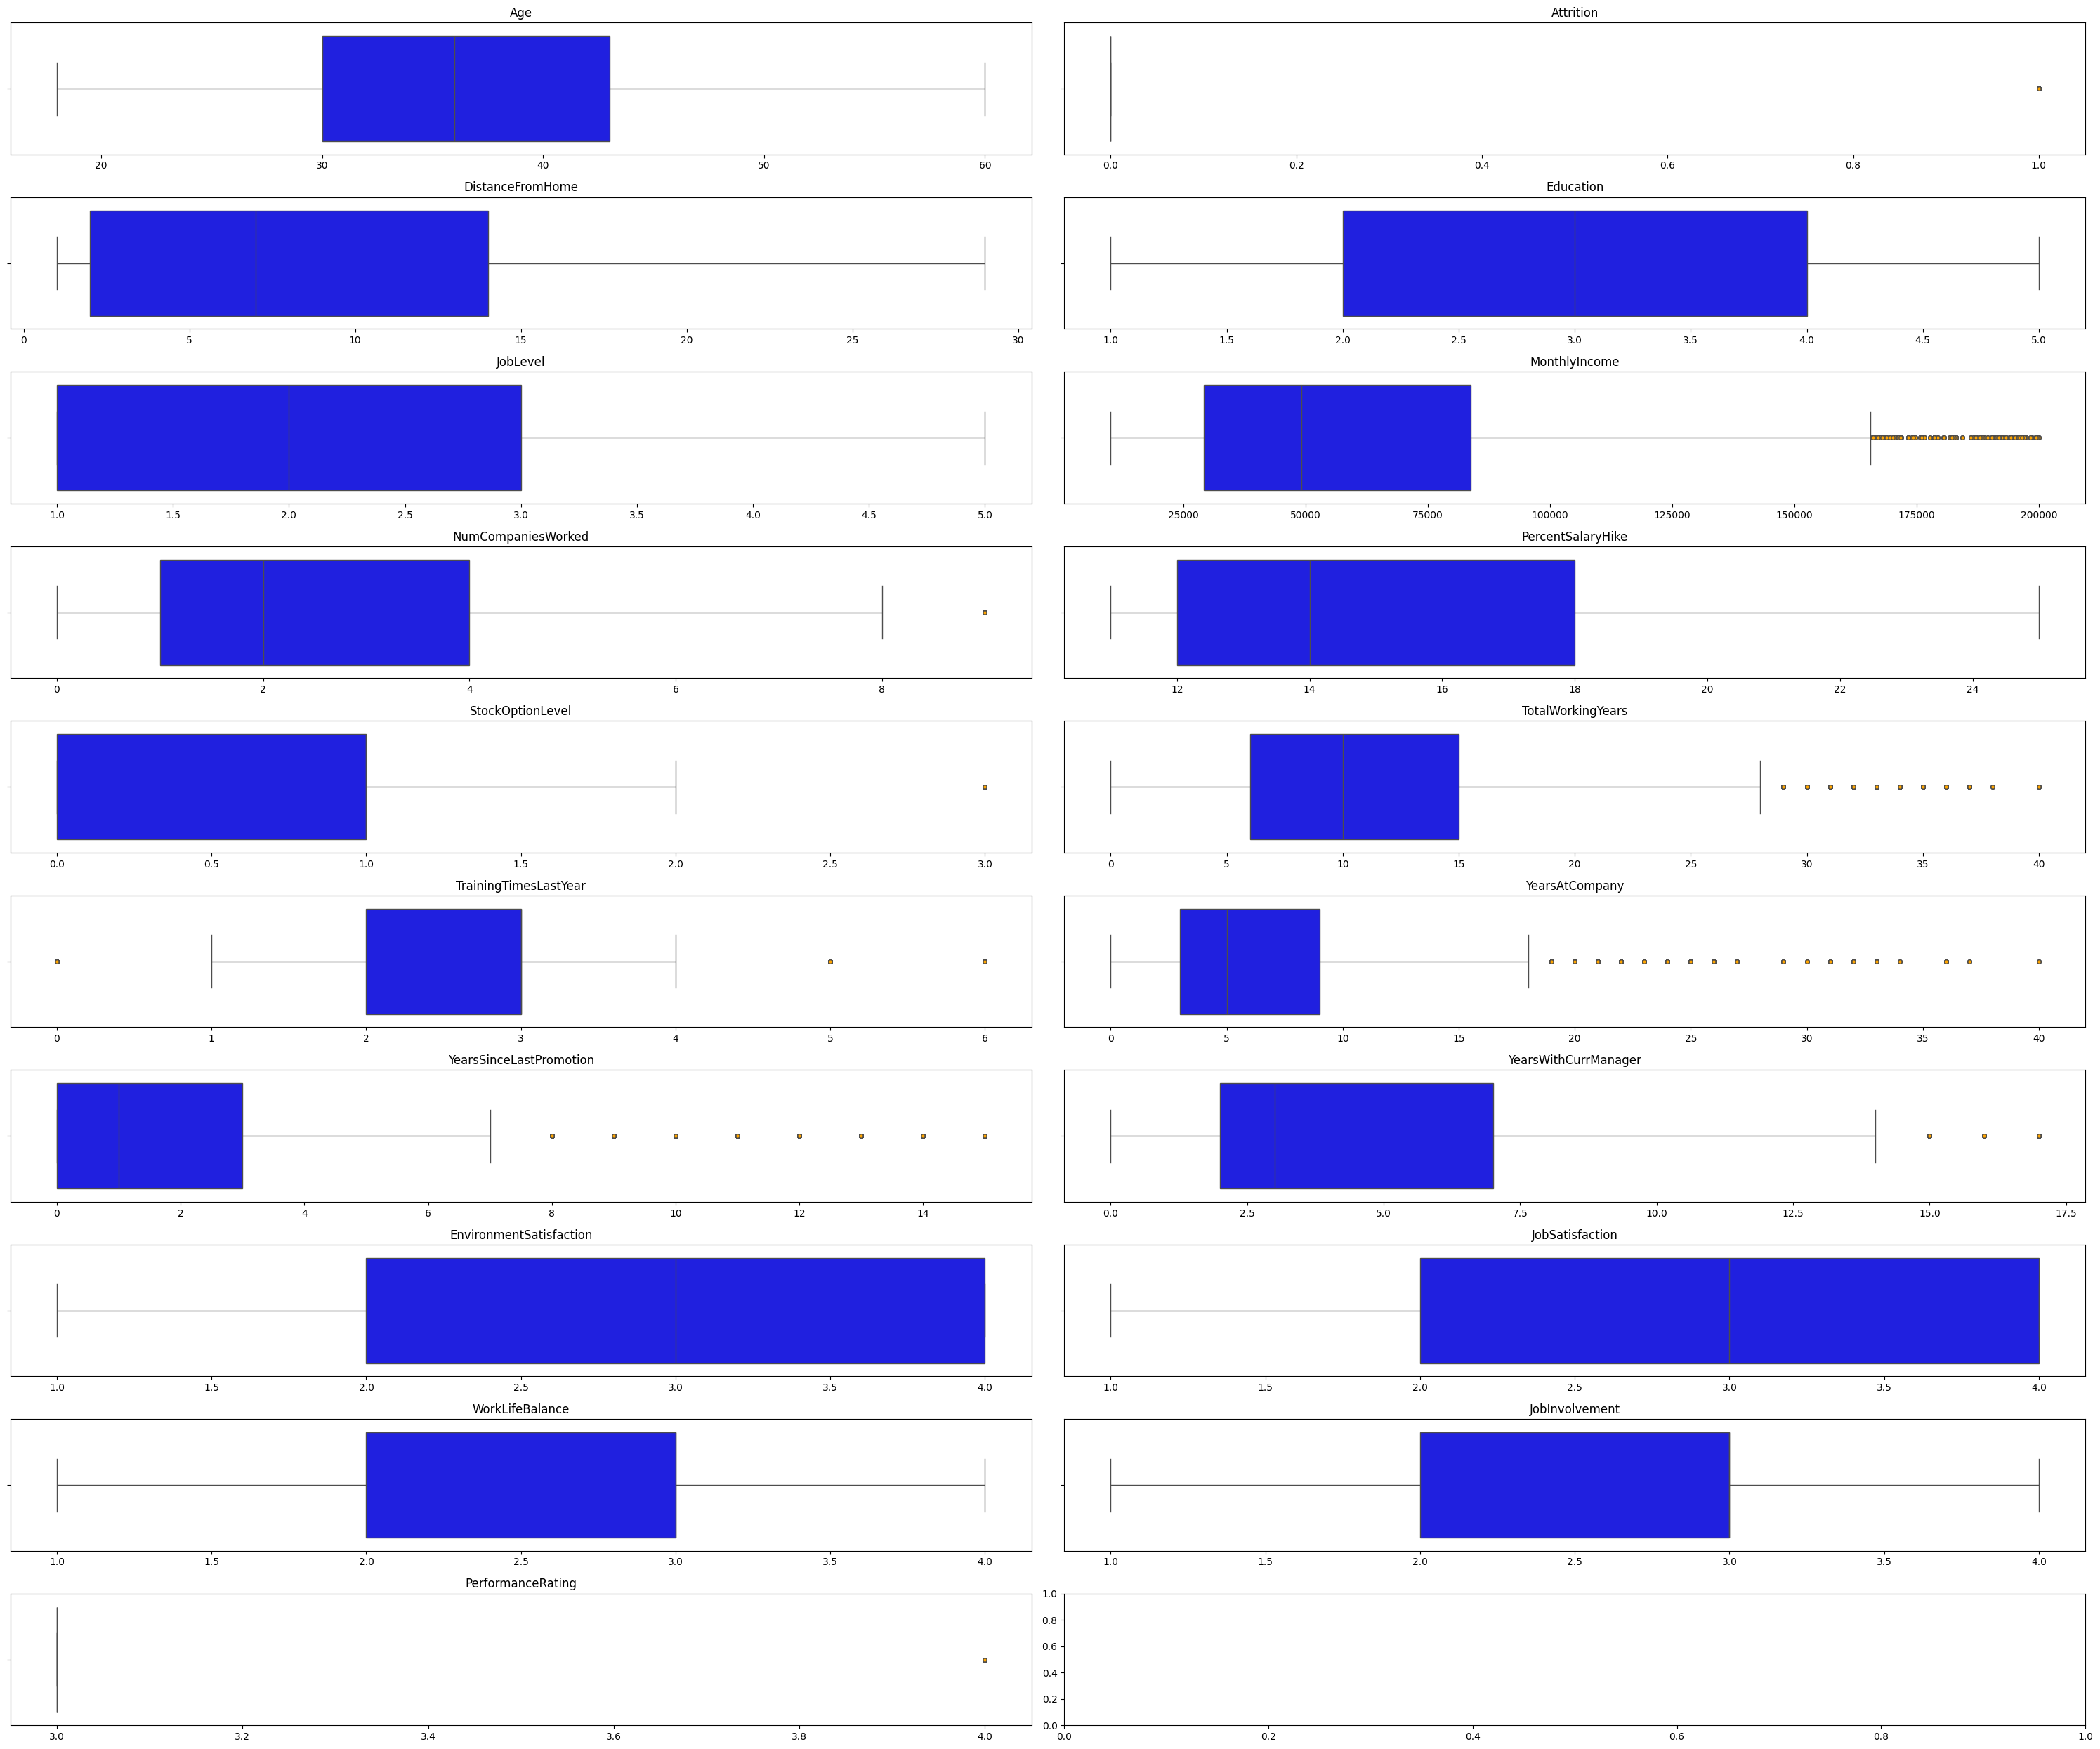

In [18]:
# Outliers
outliers_uni = so.GestionOutliersUnivariados(df)
print("ZSCORE\n")
outliers_uni.detectar_outliers_z_score()
print("\nIQR\n")
outliers_uni.detectar_outliers_iqr()
outliers_uni.visualizar_outliers_univariados(tamano_grafica=(30, 25))

In [19]:
outliers_multi = so.GestionOutliersMultivariados(df_target)
print(outliers_multi.detectar_outliers_if(0.01)["outlier"].value_counts())
outliers_multi.detectar_outliers_lof(50, 0.01)["outlier"].value_counts()
df_target = outliers_multi.detectar_outliers_lof(50, 0.1)
df_target.head()

outlier
 1    4365
-1      45
Name: count, dtype: int64


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,Over18_Y,outlier
0,51,0,0.149569,0.150224,6,2,0.166667,1,0.145038,0.124814,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,1.0,0.0,1.0,1
1,31,1,0.249097,0.157128,10,1,0.166667,1,0.181507,0.255319,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,1.0,0.0,1.0,1
2,32,0,0.249097,0.157128,17,4,0.121951,4,0.168712,0.124814,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,0.0,1.0,1.0,1
3,38,0,0.080000,0.157128,2,5,0.166667,3,0.134615,0.124814,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,0.0,1.0,1.0,1
4,32,0,0.149569,0.157128,10,1,0.161638,1,0.168712,0.255319,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,0.0,1.0,1.0,1


In [20]:
df_target = outliers_multi.eliminar_outliers_multivariados(contaminacion=0.05)
df_target

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,Over18_Y
0,51,0,0.149569,0.150224,6,2,0.166667,1,0.145038,0.124814,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,1.0,0.0,1.0
1,31,1,0.249097,0.157128,10,1,0.166667,1,0.181507,0.255319,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,1.0,0.0,1.0
2,32,0,0.249097,0.157128,17,4,0.121951,4,0.168712,0.124814,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,0.0,1.0,1.0
3,38,0,0.080000,0.157128,2,5,0.166667,3,0.134615,0.124814,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,0.0,1.0,1.0
4,32,0,0.149569,0.157128,10,1,0.161638,1,0.168712,0.255319,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,0.149569,0.157128,5,4,0.161638,1,0.181507,0.255319,60290,3.0,17,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3,1.0,0.0,1.0
4406,29,0,0.149569,0.157128,2,4,0.161638,1,0.162162,0.100917,26790,2.0,15,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3,0.0,1.0,1.0
4407,25,0,0.149569,0.157128,25,2,0.166667,2,0.168712,0.124814,37020,0.0,20,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4,0.0,1.0,1.0
4408,42,0,0.149569,0.150224,18,2,0.161638,1,0.162162,0.100917,23980,0.0,14,1,10.0,2,9,7,8,4.0,1.0,3.0,2,3,0.0,1.0,1.0


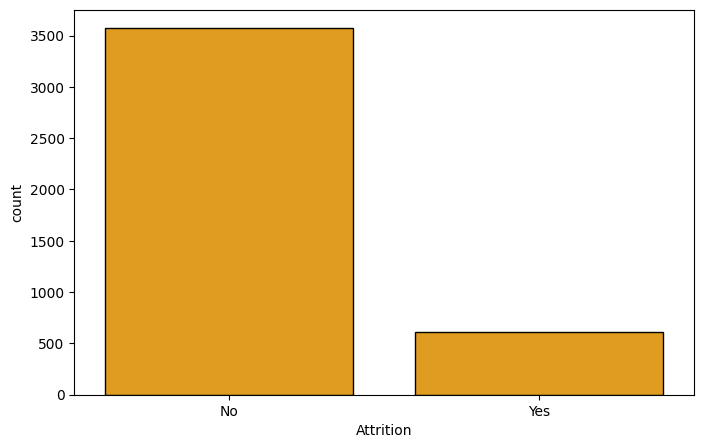

In [21]:
desbalanceo = sd.Desbalanceo(df_target, "Attrition")
desbalanceo.visualizar_clase()

In [22]:
df_target.to_pickle("datos/data_final_encoded.pkl")